In [73]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel

In [74]:
def feature_normalize(X):
    mean_r = []
    std_r = []
    X_norm = X
    nc = X.shape[1]
    for i in range(nc):
        m = np.mean(X[:,i])
        s = np.std(X[:,i])
        mean_r.append(m)
        std_r.append(m)
        X_norm[:,i] = (X_norm[:,i]-m)/s
        
    return X_norm,mean_r,std_r

In [43]:
def compute_cost(X, y, theta):
    m = y.size
    predictions = X.dot(theta)
    sqErrors = (predictions - y)
    

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

In [75]:
def gradient_descent(X,y,theta,alpha,num_iters):
    m = y.size
    J_history = np.zeros(shape=(num_iters,1))
    for i in range(num_iters):
        predictions = X.dot(theta)
        theta_size = theta.size
        for it in range(theta_size):
            temp = X[:,it]
            temp.shape = (m,1)
            errors_x1 = (predictions-y)*temp
            theta[it][0] = theta[it][0]-alpha*(1.0/m)*errors_x1.sum()
            
        J_history[i,0] = compute_cost(X,y,theta)
        
    return theta,J_history

In [76]:
data = np.loadtxt('ex1data2.txt',delimiter=',')

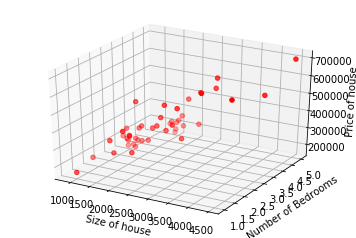

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
n = 100
for c,m,zl,zh in [('r','o',-50,-25)]:
    xs = data[:,0]
    ys = data[:,1]
    zs = data[:,2]
    ax.scatter(xs,ys,zs,c=c,marker=m)
    
ax.set_xlabel('Size of house')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price of house')

plt.show()

X = data[:,:2]
y = data[:,2]


In [78]:
m = y.size

y.shape = (m, 1)

In [79]:
x, mean_r, std_r = feature_normalize(X)


In [80]:
it = np.ones(shape=(m,3))
it[:,1:3] = x

In [81]:
iterations = 100
alpha = 0.01

[[ 215810.61679138]
 [  61446.18781361]
 [  20070.13313796]] [[  6.42977763e+10]
 [  6.30310183e+10]
 [  6.17906942e+10]
 [  6.05762369e+10]
 [  5.93870917e+10]
 [  5.82227165e+10]
 [  5.70825809e+10]
 [  5.59661664e+10]
 [  5.48729661e+10]
 [  5.38024840e+10]
 [  5.27542352e+10]
 [  5.17277455e+10]
 [  5.07225512e+10]
 [  4.97381986e+10]
 [  4.87742442e+10]
 [  4.78302542e+10]
 [  4.69058042e+10]
 [  4.60004793e+10]
 [  4.51138734e+10]
 [  4.42455895e+10]
 [  4.33952394e+10]
 [  4.25624431e+10]
 [  4.17468290e+10]
 [  4.09480338e+10]
 [  4.01657018e+10]
 [  3.93994853e+10]
 [  3.86490441e+10]
 [  3.79140452e+10]
 [  3.71941632e+10]
 [  3.64890795e+10]
 [  3.57984824e+10]
 [  3.51220671e+10]
 [  3.44595353e+10]
 [  3.38105953e+10]
 [  3.31749615e+10]
 [  3.25523545e+10]
 [  3.19425011e+10]
 [  3.13451339e+10]
 [  3.07599912e+10]
 [  3.01868171e+10]
 [  2.96253609e+10]
 [  2.90753776e+10]
 [  2.85366274e+10]
 [  2.80088755e+10]
 [  2.74918923e+10]
 [  2.69854530e+10]
 [  2.64893378e+10]

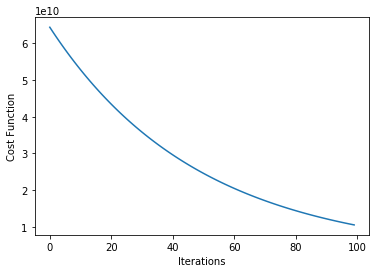

In [82]:
theta = np.zeros(shape=(3,1))
theta,J_history = gradient_descent(it,y,theta,alpha,iterations)
print theta,J_history
plot(np.arange(iterations),J_history)
xlabel("Iterations")
ylabel("Cost Function")
show()

In [83]:
price = np.array([1.0,   ((1650.0 - mean_r[0]) / std_r[0]), ((3 - mean_r[1]) / std_r[1])]).dot(theta)
print 'Predicted price of a 1650 sq-ft, 3 br house: %f' % (price)

Predicted price of a 1650 sq-ft, 3 br house: 203962.691529
